In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [55]:
item_categories = pd.read_csv('data/item_categories.csv', index_col='item_category_id')
items = pd.read_csv('data/items.csv')
sales = pd.read_csv('data/sales_train.csv')
shops = pd.read_csv('data/shops.csv')

In [56]:
print(item_categories.shape)
item_categories.head()

(84, 1)


,item_category_name
item_category_id,
0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2
2,Аксессуары - PS3
3,Аксессуары - PS4
4,Аксессуары - PSP


In [57]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [58]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [85]:
print(sales.shape)
sales.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### Looking for NaN's

In [60]:
template = 'Column {:15} has {:4} empty values'
for col in sales.columns:
    print(template.format(col, sales[col].isna().sum()))

Column date            has    0 empty values
Column date_block_num  has    0 empty values
Column shop_id         has    0 empty values
Column item_id         has    0 empty values
Column item_price      has    0 empty values
Column item_cnt_day    has    0 empty values


In [81]:
def histplots(column_names: list[str], df : pd.DataFrame,  bins : int = 200, title = None):
    plt.figure(figsize = (20, 5))
    if title: plt.suptitle(title)
    sns.set_palette(sns.color_palette('pastel'))
    for index, col in enumerate(column_names):
        plt.subplot(1, len(column_names), index+1)
        sns.histplot(df[col], bins=bins)
    plt.show()

In [62]:
num_cols = ["item_price", "item_id"]

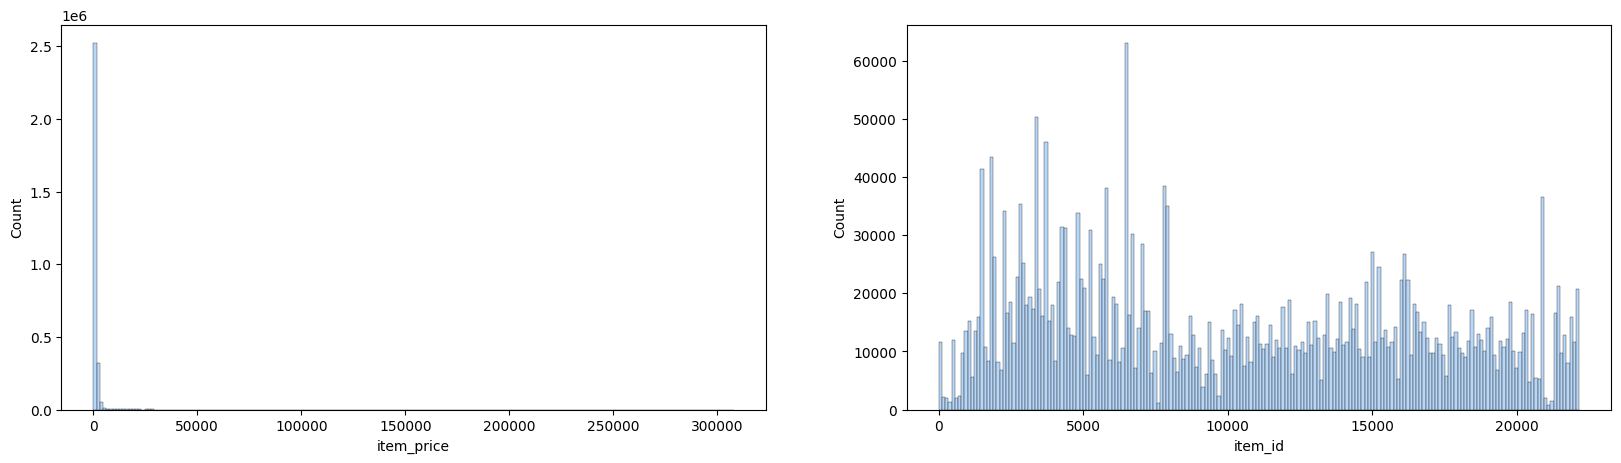

In [83]:
histplots(num_cols, sales)

### Create a monthly sales DataFrame

here we create a DataFrame that shows how many times each item was sold each month in each shop.

In [106]:
monthly_sales = sales[sales.columns[1::]].groupby(["date_block_num", "shop_id", "item_id"]).sum()

In [107]:
monthly_sales

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              0       32            884.0           6.0
                       33           1041.0           3.0
                       35            247.0           1.0
                       43            221.0           1.0
                       51            257.0           2.0
...                                    ...           ...
33             59      22087         357.0           6.0
                       22088         238.0           2.0
                       22091         179.0           1.0
                       22100         629.0           1.0
                       22102        1250.0           1.0

[1609124 rows x 2 columns]

1609124

### Seeing what are the items that form the outliers


##### Daily sells

In [64]:
mask = sales['item_cnt_day'] > 1000
sales[mask].merge(items, on='item_id', how='inner')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9


In [65]:
mask = sales['item_price'] > 50000
sales[mask].merge(items, on='item_id', how='inner')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,17.09.2013,8,12,11365,59200.0,1.0,Доставка (EMS),9
1,13.12.2013,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,75
2,20.03.2014,14,25,13199,50999.0,1.0,Коллекционные шахматы (Властелин Колец),69


In [66]:
items.merge(sales['item_id'].value_counts(), on='item_id', how='inner').sort_values('count', ascending=False)

,item_name,item_id,item_category_id,count
20602,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,31340
5717,Playstation Store пополнение бумажника: Карта ...,5822,35,9408
17418,Прием денежных средств для 1С-Онлайн,17717,79,9067
2749,"Diablo III [PC, Jewel, русская версия]",2808,30,7479
4097,Kaspersky Internet Security Multi-Device Russi...,4181,75,6853
...,...,...,...,...
10551,ДВЕНАДЦАТЬ СТУЛЬЕВ (М.ЗАХАРОВ) (1-2 СЕРИЯ) (rem),10752,40,1
10552,ДВЕНАДЦАТЬ СТУЛЬЕВ (М.ЗАХАРОВ) (3-4 СЕРИЯ) (rem),10753,40,1
10597,ДЕВУШКА С ТАТУИРОВКОЙ ДРАКОНА,10799,40,1
10633,ДЕЛО ГАСТРОНОМА № 1,10835,40,1


### Removing outliers


In [67]:
sales_sandbox = sales.copy()

In [68]:
def remove_outliers(df : pd.DataFrame, column_names : list[str]):
    for col in column_names:
        mask = abs(zscore(df[col])) > 3
        df = df.drop(df[mask].index)
    return df

In [69]:
before = sales_sandbox.shape[0]
sales_sandbox = remove_outliers(sales_sandbox, num_cols)
after = sales_sandbox.shape[0]

template = '{:2.2%} of data removed as outliers'

print(template.format(1 - (after/before)))

0.98% of data removed as outliers


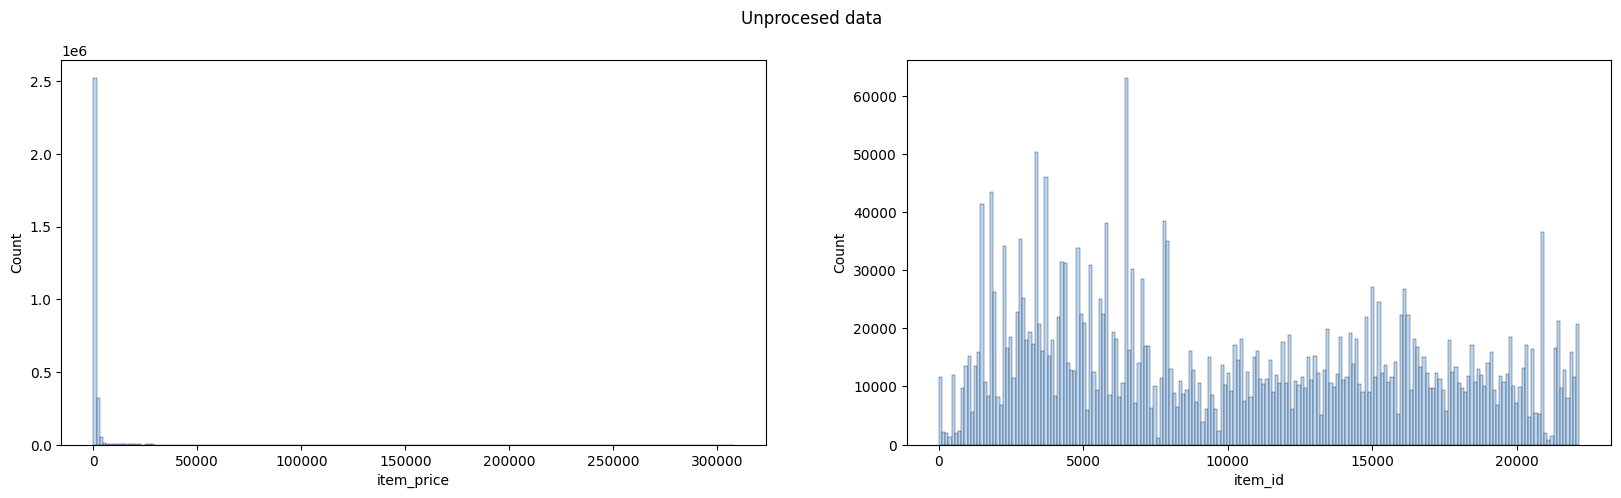

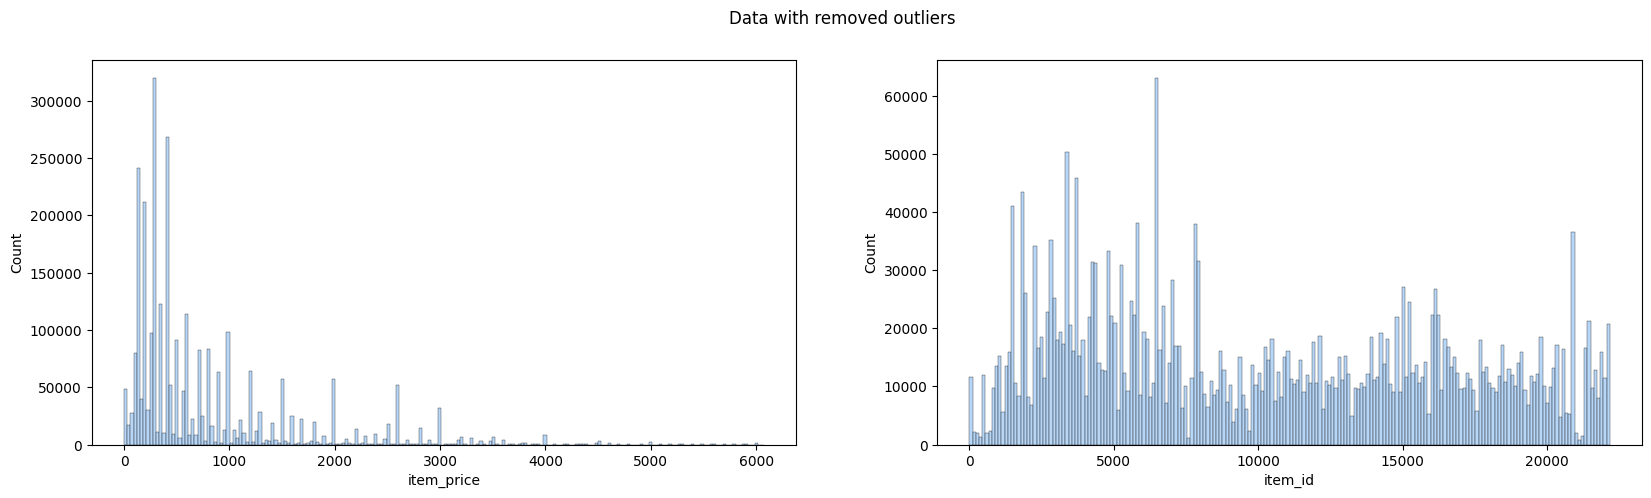

In [84]:
histplots(num_cols, sales, title="Unprocesed data")
histplots(num_cols, sales_sandbox, title="Data with removed outliers")

In [71]:
print(sales['item_cnt_day'].value_counts())
print()
print(sales_sandbox['item_cnt_day'].value_counts())

item_cnt_day
1.0       2629372
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: count, Length: 198, dtype: int64

item_cnt_day
1.0       2604403
2.0        191951
3.0         46805
4.0         19443
5.0         10347
           ...   
112.0           1
164.0           1
240.0           1
502.0           1
2169.0          1
Name: count, Length: 197, dtype: int64


In [72]:
for col in num_cols:
    sales_sandbox[f'zscore_{col}']=zscore(sales_sandbox[col])

In [73]:
sales_sandbox.sort_values('item_cnt_day', ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,zscore_item_price,zscore_item_id
2909818,28.10.2015,33,12,11373,0.908714,2169.0,-0.926233,0.185081
2326930,15.01.2015,24,12,20949,4.000000,1000.0,-0.922430,1.694268
2864235,30.09.2015,32,12,9248,1692.526158,669.0,1.155109,-0.149821
2851091,30.09.2015,32,55,9249,1702.825746,637.0,1.167781,-0.149664
2608040,14.04.2015,27,12,3731,1904.548077,624.0,1.415977,-1.019306


In [74]:
sales_sandbox['item_cnt_day'].value_counts()

item_cnt_day
1.0       2604403
2.0        191951
3.0         46805
4.0         19443
5.0         10347
           ...   
112.0           1
164.0           1
240.0           1
502.0           1
2169.0          1
Name: count, Length: 197, dtype: int64